# City of Toronto Budget Analysis - Trends
---

In [1]:
# Dependencies and Setup
%run main.ipynb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Null counts for 2019:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64

Null counts for 2020:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64

Null counts for 2021:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64

Null counts for 2022:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64

Null counts for 2023:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Catego

In [2]:
#Converting the numeric last column to datatype "float" for all calculation purpose
to_convert_budgets = [budget2019_df, budget2020_df, budget2021_df, budget2022_df, budget2023_df]
to_convert_exps = [budget2019_df_exp, budget2020_df_exp, budget2021_df_exp, budget2022_df_exp, budget2023_df_exp]
to_convert_revs = [budget2019_df_rev, budget2020_df_rev, budget2021_df_rev, budget2022_df_rev, budget2023_df_rev]

# Iterate over expense and revenue DataFrames
to_convert_dfs = list(zip(to_convert_budgets, to_convert_exps, to_convert_revs))
year = 2019

for bud_df, exp_df, rev_df in to_convert_dfs:
    column_name = f'Budgeted amount {year}'
    if column_name in bud_df.columns:
        bud_df[column_name] = pd.to_numeric(exp_df[column_name], errors='coerce')
    if column_name in exp_df.columns:
        exp_df[column_name] = pd.to_numeric(exp_df[column_name], errors='coerce')
    if column_name in rev_df.columns:
        rev_df[column_name] = pd.to_numeric(rev_df[column_name], errors='coerce')
    year += 1

revs_year = 2019
for revs_df in to_convert_revs:
    revs_column_name = f'Budgeted amount {revs_year}'
    revs_df[revs_column_name] = pd.to_numeric(revs_df[revs_column_name], errors='coerce').abs()
    revs_year += 1

C:\Users\lukas\AppData\Local\Temp\ipykernel_18928\2631859294.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[column_name] = pd.to_numeric(exp_df[column_name], errors='coerce')
C:\Users\lukas\AppData\Local\Temp\ipykernel_18928\2631859294.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_df[column_name] = pd.to_numeric(rev_df[column_name], errors='coerce')
C:\Users\lukas\AppData\Local\Temp\ipykernel_18928\2631859294.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

# Trends - Revenue per Category

In [3]:
#Create DataFrames with summed values by Category
rev_category_2019 = pd.DataFrame(budget2019_df_rev.groupby("Category Name")["Budgeted amount 2019"].sum().round(2))
rev_category_2020 = pd.DataFrame(budget2020_df_rev.groupby("Category Name")["Budgeted amount 2020"].sum().round(2))
rev_category_2021 = pd.DataFrame(budget2021_df_rev.groupby("Category Name")["Budgeted amount 2021"].sum().round(2))
rev_category_2022 = pd.DataFrame(budget2022_df_rev.groupby("Category Name")["Budgeted amount 2022"].sum().round(2))
rev_category_2023 = pd.DataFrame(budget2023_df_rev.groupby("Category Name")["Budgeted amount 2023"].sum().round(2))

#Create Main DataFrame with revenue by category for all 5 years
rev_category_timeline = pd.merge(rev_category_2019, rev_category_2020, on="Category Name", how="outer")
rev_category_timeline = pd.merge(rev_category_timeline, rev_category_2021, on="Category Name", how="outer")
rev_category_timeline = pd.merge(rev_category_timeline, rev_category_2022, on="Category Name", how="outer")
rev_category_timeline = pd.merge(rev_category_timeline, rev_category_2023, on="Category Name", how="outer")

#Clean on null values
rev_category_timeline = rev_category_timeline.fillna(0.00)
rev_category_timeline = pd.DataFrame(rev_category_timeline.loc[(rev_category_timeline["Budgeted amount 2019"] > 0.00)|(rev_category_timeline["Budgeted amount 2020"] > 0.00)|(rev_category_timeline["Budgeted amount 2021"] > 0.00)|(rev_category_timeline["Budgeted amount 2022"] > 0.00)|(rev_category_timeline["Budgeted amount 2023"] > 0.00),:])

rev_category_timeline

,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
Category Name,,,,,
Contribution From Reserves/Reserve Funds,5.416716e+08,5.230802e+08,5.267768e+08,6.126027e+08,7.260764e+08
Federal Subsidies,2.143136e+08,2.513977e+08,2.883508e+08,2.875820e+08,9.155042e+08
Inter-Divisional Recoveries,3.161486e+08,1.572818e+08,0.000000e+00,3.124781e+08,3.197343e+08
Licences & Permits Revenue,1.389864e+08,1.416429e+08,0.000000e+00,0.000000e+00,0.000000e+00
Other Subsidies,8.450810e+06,1.813821e+07,0.000000e+00,0.000000e+00,0.000000e+00
Provincial Subsidies,2.420082e+09,2.222765e+09,3.847996e+09,3.805709e+09,3.357879e+09
Sundry and Other Revenues,7.322785e+09,7.630286e+09,0.000000e+00,0.000000e+00,0.000000e+00
Transfers From Capital,2.069584e+08,2.788116e+08,1.923544e+08,2.071879e+08,2.297670e+08
User Fees & Donations,2.384165e+09,2.449051e+09,1.624933e+09,1.973689e+09,2.239722e+09


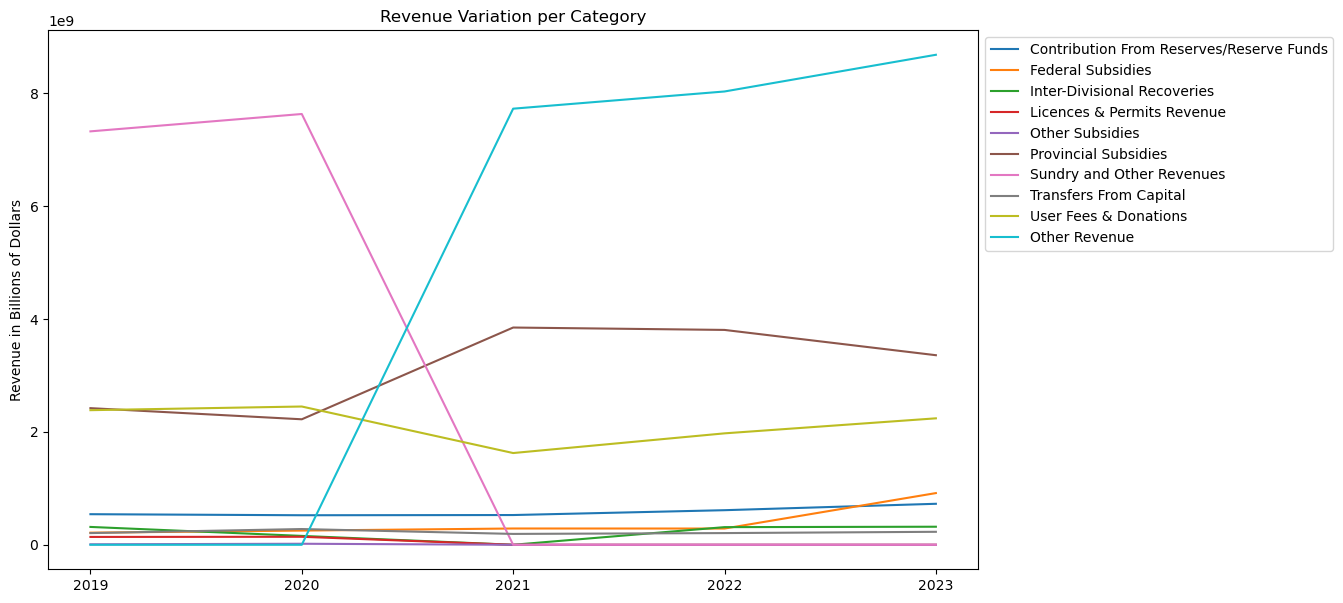

In [4]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = rev_category_timeline.iloc[1]

fig, ax = plt.subplots(figsize=(12, 7))

for i, (index, row) in enumerate(rev_category_timeline.iterrows()):
        plt.plot(x_axis, rev_category_timeline.iloc[i], label=index)

plt.ylabel("Revenue in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Revenue Variation per Category")
plt.savefig("output/Trends/Revenue Variation per Category.png", bbox_inches='tight')
plt.show()

In [5]:
rev_category_timeline2 = rev_category_timeline.drop(index=["Sundry and Other Revenues", "Other Revenue"])
rev_category_timeline2

,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
Category Name,,,,,
Contribution From Reserves/Reserve Funds,5.416716e+08,5.230802e+08,5.267768e+08,6.126027e+08,7.260764e+08
Federal Subsidies,2.143136e+08,2.513977e+08,2.883508e+08,2.875820e+08,9.155042e+08
Inter-Divisional Recoveries,3.161486e+08,1.572818e+08,0.000000e+00,3.124781e+08,3.197343e+08
Licences & Permits Revenue,1.389864e+08,1.416429e+08,0.000000e+00,0.000000e+00,0.000000e+00
Other Subsidies,8.450810e+06,1.813821e+07,0.000000e+00,0.000000e+00,0.000000e+00
Provincial Subsidies,2.420082e+09,2.222765e+09,3.847996e+09,3.805709e+09,3.357879e+09
Transfers From Capital,2.069584e+08,2.788116e+08,1.923544e+08,2.071879e+08,2.297670e+08
User Fees & Donations,2.384165e+09,2.449051e+09,1.624933e+09,1.973689e+09,2.239722e+09


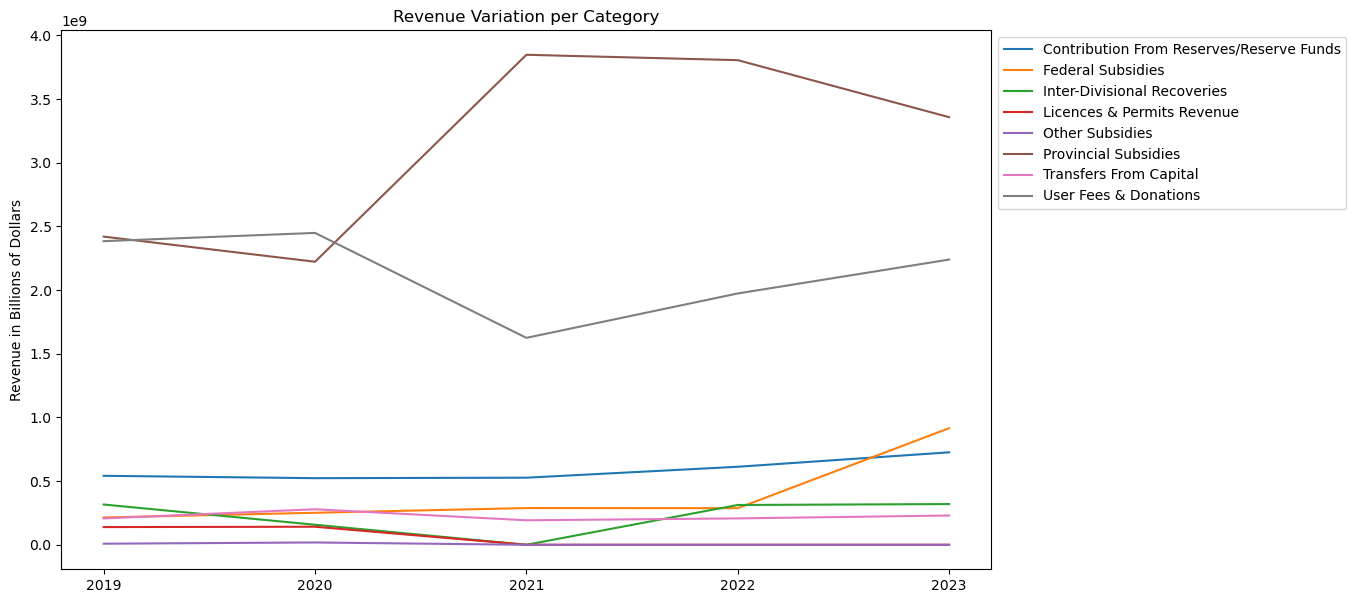

In [6]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = rev_category_timeline2.iloc[1]

fig, ax = plt.subplots(figsize=(12, 7))

for i, (index, row) in enumerate(rev_category_timeline2.iterrows()):
        plt.plot(x_axis, rev_category_timeline2.iloc[i], label=index)

plt.ylabel("Revenue in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Revenue Variation per Category")
plt.savefig("output/Trends/Revenue Variation per Category2.png", bbox_inches='tight')
plt.show()

# Trends - Expenses per Category

In [7]:
#Create DataFrames with summed values by Category
exp_category_2019 = pd.DataFrame(budget2019_df_exp.groupby("Category Name")["Budgeted amount 2019"].sum().round(2))
exp_category_2020 = pd.DataFrame(budget2020_df_exp.groupby("Category Name")["Budgeted amount 2020"].sum().round(2))
exp_category_2021 = pd.DataFrame(budget2021_df_exp.groupby("Category Name")["Budgeted amount 2021"].sum().round(2))
exp_category_2022 = pd.DataFrame(budget2022_df_exp.groupby("Category Name")["Budgeted amount 2022"].sum().round(2))
exp_category_2023 = pd.DataFrame(budget2023_df_exp.groupby("Category Name")["Budgeted amount 2023"].sum().round(2))

#Create Main DataFrame with revenue by category for all 5 years
exp_category_timeline = pd.merge(exp_category_2019, exp_category_2020, on="Category Name", how="outer")
exp_category_timeline = pd.merge(exp_category_timeline, exp_category_2021, on="Category Name", how="outer")
exp_category_timeline = pd.merge(exp_category_timeline, exp_category_2022, on="Category Name", how="outer")
exp_category_timeline = pd.merge(exp_category_timeline, exp_category_2023, on="Category Name", how="outer")

#Clean on null values
exp_category_timeline = exp_category_timeline.fillna(0.00)
exp_category_timeline = pd.DataFrame(exp_category_timeline.loc[(exp_category_timeline["Budgeted amount 2019"] > 0.00)|(exp_category_timeline["Budgeted amount 2020"] > 0.00)|(exp_category_timeline["Budgeted amount 2021"] > 0.00)|(exp_category_timeline["Budgeted amount 2022"] > 0.00)|(exp_category_timeline["Budgeted amount 2023"] > 0.00),:])

exp_category_timeline


,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
Category Name,,,,,
Contribution To Capital,3.434535e+08,3.434555e+08,3.495350e+08,3.477590e+08,3.454875e+08
Contribution To Reserves/Reserve Funds,1.374326e+09,1.492208e+09,1.569495e+09,6.790572e+08,8.177363e+08
Equipment,6.256912e+07,6.305564e+07,6.305676e+07,6.962870e+07,7.491960e+07
Inter-Divisional Charges,3.161485e+08,1.569948e+08,0.000000e+00,3.124781e+08,3.197343e+08
Materials & Supplies,7.350228e+08,7.344638e+08,8.132794e+08,8.103749e+08,8.393636e+08
Other Expenditures,2.711142e+09,2.611534e+09,2.835060e+09,2.776243e+09,3.063181e+09
Salaries And Benefits,5.928046e+09,6.092481e+09,0.000000e+00,0.000000e+00,0.000000e+00
Service And Rent,2.082853e+09,2.178262e+09,2.342040e+09,2.632925e+09,3.071138e+09
Benefits,0.000000e+00,0.000000e+00,1.450706e+09,1.488014e+09,1.586110e+09


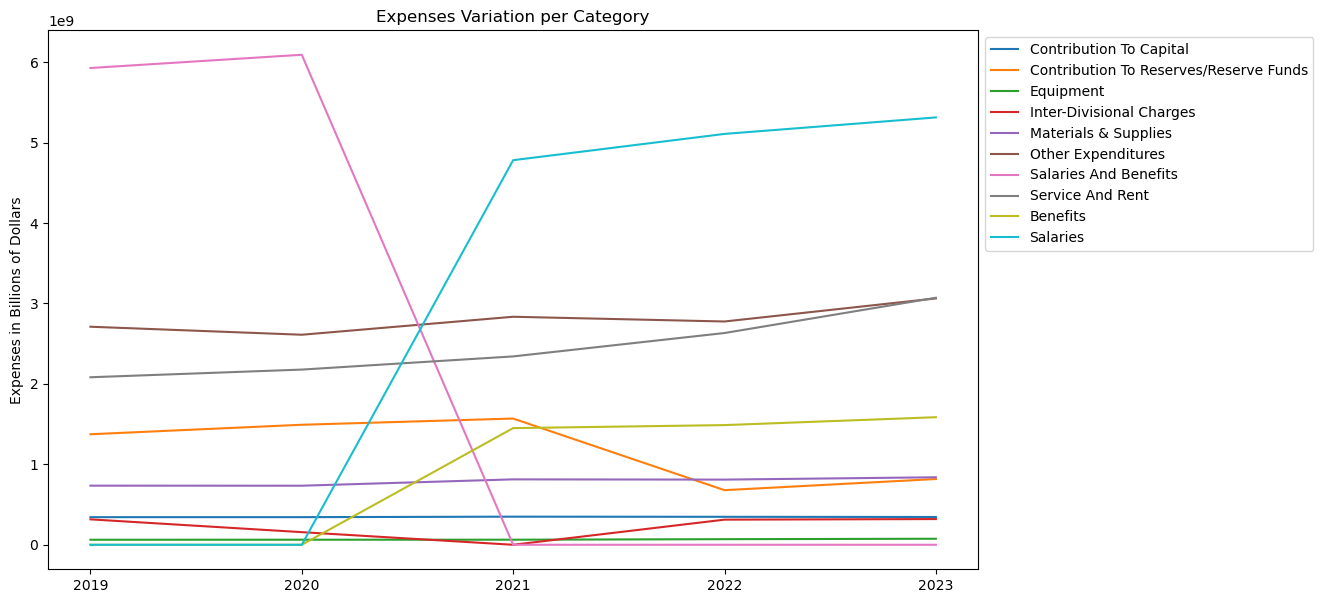

In [8]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = exp_category_timeline.iloc[1]

fig, ax = plt.subplots(figsize=(12, 7))

for i, (index, row) in enumerate(exp_category_timeline.iterrows()):
        plt.plot(x_axis, exp_category_timeline.iloc[i], label=index)

plt.ylabel("Expenses in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Expenses Variation per Category")
plt.savefig("output/Trends/Expenses Variation per Category.png", bbox_inches='tight')
plt.show()

# Trends - Profit and Loss by Program


In [9]:
#Create new DataFrame for each year by Program, sorting by the total Result for the five year timeframe
pandl_2019 = pd.DataFrame()
pandl_2020 = pd.DataFrame()
pandl_2021 = pd.DataFrame()
pandl_2022 = pd.DataFrame()
pandl_2023 = pd.DataFrame()

pandl_2019["rev"] = budget2019_df_rev.groupby("Program")["Budgeted amount 2019"].sum()
pandl_2019["exp"] = budget2019_df_exp.groupby("Program")["Budgeted amount 2019"].sum()
pandl_2019["res-2019"] = pandl_2019["rev"] - pandl_2019["exp"]
pandl_2019 = pandl_2019.drop(columns=["rev", "exp"])
pandl_2020["rev"] = budget2020_df_rev.groupby("Program")["Budgeted amount 2020"].sum()
pandl_2020["exp"] = budget2020_df_exp.groupby("Program")["Budgeted amount 2020"].sum()
pandl_2020["res-2020"] = pandl_2020["rev"] - pandl_2020["exp"]
pandl_2020 = pandl_2020.drop(columns=["rev", "exp"])
pandl_2021["rev"] = budget2021_df_rev.groupby("Program")["Budgeted amount 2021"].sum()
pandl_2021["exp"] = budget2021_df_exp.groupby("Program")["Budgeted amount 2021"].sum()
pandl_2021["res-2021"] = pandl_2021["rev"] - pandl_2021["exp"]
pandl_2021 = pandl_2021.drop(columns=["rev", "exp"])
pandl_2022["rev"] = budget2022_df_rev.groupby("Program")["Budgeted amount 2022"].sum()
pandl_2022["exp"] = budget2022_df_exp.groupby("Program")["Budgeted amount 2022"].sum()
pandl_2022["res-2022"] = pandl_2022["rev"] - pandl_2022["exp"]
pandl_2022 = pandl_2022.drop(columns=["rev", "exp"])
pandl_2023["rev"] = budget2023_df_rev.groupby("Program")["Budgeted amount 2023"].sum()
pandl_2023["exp"] = budget2023_df_exp.groupby("Program")["Budgeted amount 2023"].sum()
pandl_2023["res-2023"] = pandl_2023["rev"] - pandl_2023["exp"]
pandl_2023 = pandl_2023.drop(columns=["rev", "exp"])
pandl_2020
pandl_timeline = pd.merge(pandl_2019, pandl_2020, on="Program", how="outer")
pandl_timeline = pd.merge(pandl_timeline, pandl_2021, on="Program", how="outer")
pandl_timeline = pd.merge(pandl_timeline, pandl_2022, on="Program", how="outer")
pandl_timeline = pd.merge(pandl_timeline, pandl_2023, on="Program", how="outer")
pandl_timeline["Acc 5 Years"] = pandl_timeline.sum(axis=1)
pandl_timeline = pandl_timeline.sort_values("Acc 5 Years", ascending=False)
pandl_timeline

,res-2019,res-2020,res-2021,res-2022,res-2023,Acc 5 Years
Program,,,,,,
Non-Program Taxation Tax Levy,4.312970e+09,4.424468e+09,4.489182e+09,4.645212e+09,4.908092e+09,2.277992e+10
Non-Program Revenues,1.425733e+09,1.487400e+09,2.769604e+09,2.723871e+09,2.411922e+09,1.081853e+10
Toronto Water,-5.260000e+00,-3.330000e+00,-4.858000e+01,9.757927e+08,9.993699e+08,1.975163e+09
Court Services,6.436092e+06,4.001412e+07,4.400115e+07,3.632767e+07,5.523187e+07,1.820109e+08
Toronto Building,1.589422e+07,1.614689e+07,1.614690e+07,1.614689e+07,1.614689e+07,8.048179e+07
...,...,...,...,...,...,...
Fire Services,-4.757832e+08,-4.766023e+08,-4.886179e+08,-5.026978e+08,-5.030049e+08,-2.446706e+09
"Shelter, Support & Housing Administration",-4.629616e+08,-5.067888e+08,-7.772719e+08,-4.546126e+08,-4.917394e+08,-2.693374e+09
Capital & Corporate Financing,-9.321673e+08,-9.557735e+08,-1.008401e+09,-8.613915e+08,-9.202027e+08,-4.677936e+09


In [10]:
del pandl_timeline["Acc 5 Years"]
pandl_timeline.head(7)

,res-2019,res-2020,res-2021,res-2022,res-2023
Program,,,,,
Non-Program Taxation Tax Levy,4.312970e+09,4.424468e+09,4.489182e+09,4.645212e+09,4.908092e+09
Non-Program Revenues,1.425733e+09,1.487400e+09,2.769604e+09,2.723871e+09,2.411922e+09
Toronto Water,-5.260000e+00,-3.330000e+00,-4.858000e+01,9.757927e+08,9.993699e+08
Court Services,6.436092e+06,4.001412e+07,4.400115e+07,3.632767e+07,5.523187e+07
Toronto Building,1.589422e+07,1.614689e+07,1.614690e+07,1.614689e+07,1.614689e+07
Toronto Parking Authority,-6.000000e+00,-2.380000e+00,-9.110000e+00,1.440144e+07,2.544384e+07
Solid Waste Management Services,6.280000e+00,-6.720000e+00,-1.530000e+00,1.315744e+07,1.200403e+07


In [11]:
pandl_timeline.tail(7)

,res-2019,res-2020,res-2021,res-2022,res-2023
Program,,,,,
"Parks, Forestry & Recreation",-3.250350e+08,-3.230675e+08,-3.443521e+08,-3.441745e+08,-3.396806e+08
Non-Program Expenditures,-4.461500e+08,-3.536494e+08,-3.677476e+08,-5.987614e+08,-4.523898e+08
Fire Services,-4.757832e+08,-4.766023e+08,-4.886179e+08,-5.026978e+08,-5.030049e+08
"Shelter, Support & Housing Administration",-4.629616e+08,-5.067888e+08,-7.772719e+08,-4.546126e+08,-4.917394e+08
Capital & Corporate Financing,-9.321673e+08,-9.557735e+08,-1.008401e+09,-8.613915e+08,-9.202027e+08
Toronto Transit Commission - Conventional,-6.219578e+08,-6.425820e+08,-1.471938e+09,-1.285315e+09,-1.189272e+09
Toronto Police Service,-1.026771e+09,-1.076195e+09,-1.080093e+09,-1.118219e+09,-1.166526e+09


In [12]:
# Create the DataFrames for More Profitable Programs
panl_mgain = pandl_timeline.iloc[0:7,0:5]
#Dropping incomplete Programs:
panl_mgain = panl_mgain.drop(["Toronto Water", "Toronto Parking Authority", "Solid Waste Management Services"])
panl_mgain

,res-2019,res-2020,res-2021,res-2022,res-2023
Program,,,,,
Non-Program Taxation Tax Levy,4.312970e+09,4.424468e+09,4.489182e+09,4.645212e+09,4.908092e+09
Non-Program Revenues,1.425733e+09,1.487400e+09,2.769604e+09,2.723871e+09,2.411922e+09
Court Services,6.436092e+06,4.001412e+07,4.400115e+07,3.632767e+07,5.523187e+07
Toronto Building,1.589422e+07,1.614689e+07,1.614690e+07,1.614689e+07,1.614689e+07


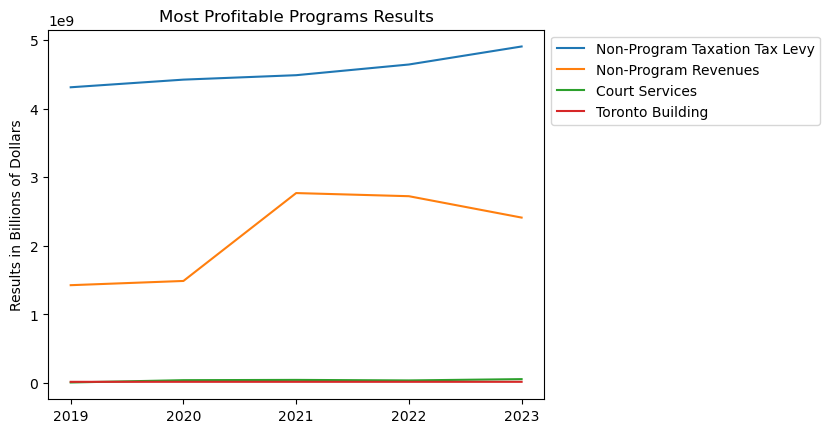

In [13]:
for i, (index, row) in enumerate(panl_mgain.iterrows()):
        plt.plot(x_axis, panl_mgain.iloc[i], label=index)

plt.ylabel("Results in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Most Profitable Programs Results")
plt.savefig("output/Trends/Most Profitable Programs Results.png", bbox_inches='tight')
plt.show()

In [14]:
# Understanding Non-Program Revenues
non_program_rev = budget2023_df_rev.loc[budget2023_df_rev["Program"] == "Non-Program Revenues",:]
non_program_rev = pd.DataFrame((non_program_rev.groupby("Commitment item")["Budgeted amount 2023"].sum()).sort_values(ascending=False))
non_program_rev.head(10)

,Budgeted amount 2023
Commitment item,
Municipal Land Transfer Tax,944020500.0
Provincial Grants & Subsidies,932776800.0
Investment Income,246194300.0
Payments In Lieu Of Taxes,96237990.0
Contributions From Reserve Funds,92478400.0
Fines,75696000.0
Hotel and Lodging Tax,69337000.0
Tax Levy,65733680.0
Sundry Revenue,41423910.0


In [15]:
# Create the DataFrames for less profitable Programs
panl_mloss = pandl_timeline.iloc[-7:,0:5]
panl_mloss

,res-2019,res-2020,res-2021,res-2022,res-2023
Program,,,,,
"Parks, Forestry & Recreation",-3.250350e+08,-3.230675e+08,-3.443521e+08,-3.441745e+08,-3.396806e+08
Non-Program Expenditures,-4.461500e+08,-3.536494e+08,-3.677476e+08,-5.987614e+08,-4.523898e+08
Fire Services,-4.757832e+08,-4.766023e+08,-4.886179e+08,-5.026978e+08,-5.030049e+08
"Shelter, Support & Housing Administration",-4.629616e+08,-5.067888e+08,-7.772719e+08,-4.546126e+08,-4.917394e+08
Capital & Corporate Financing,-9.321673e+08,-9.557735e+08,-1.008401e+09,-8.613915e+08,-9.202027e+08
Toronto Transit Commission - Conventional,-6.219578e+08,-6.425820e+08,-1.471938e+09,-1.285315e+09,-1.189272e+09
Toronto Police Service,-1.026771e+09,-1.076195e+09,-1.080093e+09,-1.118219e+09,-1.166526e+09


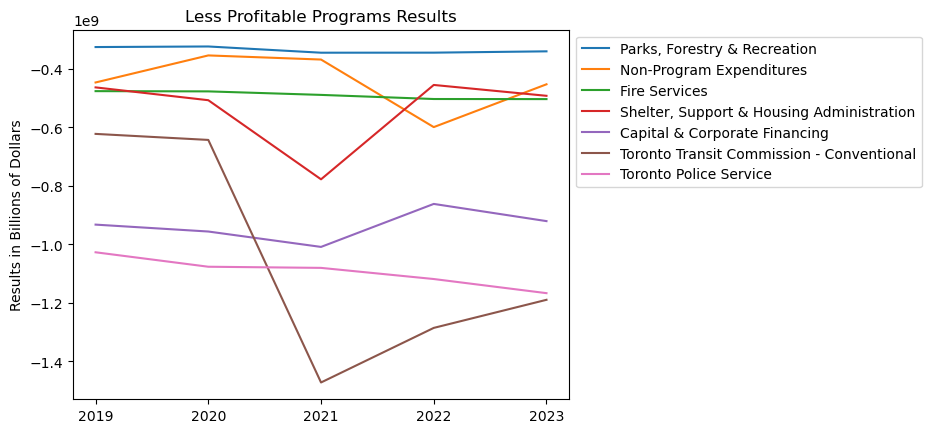

In [16]:
for i, (index, row) in enumerate(panl_mloss.iterrows()):
        plt.plot(x_axis, panl_mloss.iloc[i], label=index)

plt.ylabel("Results in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Less Profitable Programs Results")
plt.savefig("output/Trends/Less Profitable Programs Results.png", bbox_inches='tight')
plt.show()

# Trends - City Revenue Moving Average

In [17]:
#Revenue Timeline

#Setting up paths for source files for 5 years prior main.ipynb timeframe
budget_2014_path = "Resources/approved-operating-budget-summary-2014.xlsx"
budget_2015_path = "Resources/approved-operating-budget-summary-2015.xlsx"
budget_2016_path = "Resources/approved-operating-budget-summary-2016.xlsx"
budget_2017_path = "Resources/approved-operating-budget-summary-2017.xlsx"
budget_2018_path = "Resources/approved-operating-budget-summary-2018.xlsx"

budget_2014 = pd.read_excel(budget_2014_path, sheet_name='2014')
budget_2015 = pd.read_excel(budget_2015_path, sheet_name='summary')
budget_2016 = pd.read_excel(budget_2016_path, sheet_name='Open Data Summary')
budget_2017 = pd.read_excel(budget_2017_path, sheet_name='2017')
budget_2018 = pd.read_excel(budget_2018_path, sheet_name='Open Data')

budget_2014["Rev-2014"] = budget_2014[2014.0][budget_2014["Expense/Revenue"] == "Revenues"].abs()
budget_2015["Rev-2015"] = budget_2015[2015.0][budget_2015["Expense/Revenue"] == "Revenues"].abs()
budget_2016 = budget_2016.rename(columns={budget_2016.columns[4]: 2016.0})
budget_2016["Rev-2016"] = budget_2016[2016.0][budget_2016["Expense/Revenue"] == "Revenues"].abs()
budget_2017["Rev-2017"] = budget_2017[2017.0][budget_2017["Expense/Revenue"] == "Revenues"].abs()
budget_2018["Rev-2018"] = budget_2018[2018.0][budget_2018["Expense/Revenue"] == "Revenues"].abs()

rev_exp_tl_lg = {
    2014: budget_2014["Rev-2014"].sum().round(2),
    2015: budget_2015["Rev-2015"].sum().round(2),
    2016: budget_2016["Rev-2016"].sum().round(2),
    2017: budget_2017["Rev-2017"].sum().round(2),
    2018: budget_2018["Rev-2018"].sum().round(2),
    2019: budget2019_df_rev["Budgeted amount 2019"].sum().round(2),
    2020: budget2020_df_rev["Budgeted amount 2020"].sum().round(2),
    2021: budget2021_df_rev["Budgeted amount 2021"].sum().round(2),
    2022: budget2022_df_rev["Budgeted amount 2022"].sum().round(2),
    2023: budget2023_df_rev["Budgeted amount 2023"].sum().round(2),
    2024: 0
}

moving_average_3 = {
    2014 : 0,
    2015 : 0,
    2016 : 0
}

i = 2017
while i <= 2024:
    av = ((rev_exp_tl_lg[i-1] + rev_exp_tl_lg[i-2] + rev_exp_tl_lg[i-3]) / 3)
    moving_average_3[i] = av
    i += 1
    
print(rev_exp_tl_lg)

C:\Users\lukas\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


{2014: 11207754429.39, 2015: 11638709235.24, 2016: 11797785419.35, 2017: 12401686197.56, 2018: 13060140475.73, 2019: 13553560729.85, 2020: 13672454504.39, 2021: 14205051857.55, 2022: 15228412045.28, 2023: 16467962592.79, 2024: 0}


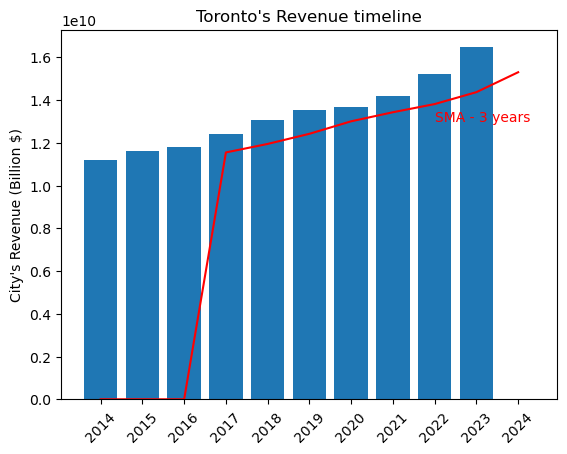

In [18]:
x_ax1_lg = range(2014, 2025)

plt.bar(x_ax1_lg, rev_exp_tl_lg.values())
plt.plot(x_ax1_lg, moving_average_3.values(), color="red")
plt.ylabel("City's Revenue (Billion $)")
plt.title("Toronto's Revenue timeline")
plt.xticks(x_ax1_lg, rotation=45)
plt.annotate("SMA - 3 years", xy=(2022,13000000000), color="red")
plt.savefig("output/Trends/Toronto Revenue timeline.png")
plt.show()